# Reading Data (MileStone - 1)

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("amazonLabelled.csv")

In [3]:
df.shape

(999, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 3 columns):
S            999 non-null int64
Feedback     999 non-null object
Sentiment    999 non-null object
dtypes: int64(1), object(2)
memory usage: 23.5+ KB


In [5]:
df.describe()

,S
count,999.000000
mean,500.000000
std,288.530761
min,1.000000
25%,250.500000
50%,500.000000
75%,749.500000
max,999.000000


In [6]:
df.head()

,S,Feedback,Sentiment
0,1,"Good case, Excellent value.",Positive
1,2,Great for the jawbone.,Positive
2,3,Tied to charger for conversations lasting more...,Negative
3,4,The mic is great.,Positive
4,5,I have to jiggle the plug to get it to line up...,Negative


In [7]:
df.tail()

,S,Feedback,Sentiment
994,995,The screen does get smudged easily because it ...,Negative
995,996,What a piece of junk.. I lose more calls on th...,Negative
996,997,Item Does Not Match Picture.,Negative
997,998,The only thing that disappoint me is the infra...,Negative
998,999,"You can not answer calls with the unit, never ...",Negative


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [9]:
def find(x):
    ans=0
    for sen in x:
        if (sen=='Positive'):
            ans=ans+1
    return ans 

In [10]:
Positive = find(df["Sentiment"])
print(Positive)

500


In [11]:
Negative = len(df.Sentiment)-Positive
print(Negative)

499


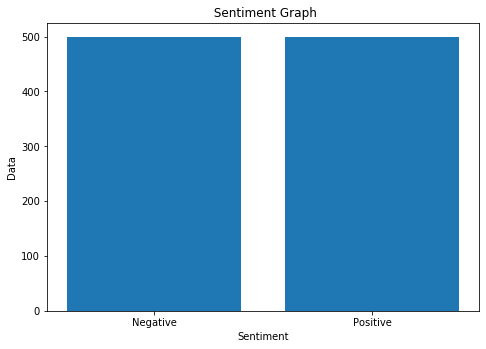

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Sentiment = ['Negative', 'Positive']
data = [Negative, Positive]
ax.bar(Sentiment, data)
plt.xlabel('Sentiment')
plt.ylabel('Data')
plt.title(" Sentiment Graph")
plt.show()

# Milestone - 2
# Removing Punctuation

In [13]:
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

def remove_puc(text):
    for ele in text:
        if ele in punc:
            text = text.replace(ele, "")
    return text

In [14]:
df["punctuation_removed"] = df["Feedback"].apply(lambda x: remove_puc(x))

In [15]:
df.punctuation_removed[0]

'Good case Excellent value'

In [16]:
df.head()

,S,Feedback,Sentiment,punctuation_removed
0,1,"Good case, Excellent value.",Positive,Good case Excellent value
1,2,Great for the jawbone.,Positive,Great for the jawbone
2,3,Tied to charger for conversations lasting more...,Negative,Tied to charger for conversations lasting more...
3,4,The mic is great.,Positive,The mic is great
4,5,I have to jiggle the plug to get it to line up...,Negative,I have to jiggle the plug to get it to line up...


# Tokenization using NLTK


In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [18]:
from nltk.tokenize import sent_tokenize

df["nltk_token"] = df["punctuation_removed"].apply(lambda x: word_tokenize(x.lower()))

df.nltk_token[0]

['good', 'case', 'excellent', 'value']

In [19]:
df.head()

,S,Feedback,Sentiment,punctuation_removed,nltk_token
0,1,"Good case, Excellent value.",Positive,Good case Excellent value,"[good, case, excellent, value]"
1,2,Great for the jawbone.,Positive,Great for the jawbone,"[great, for, the, jawbone]"
2,3,Tied to charger for conversations lasting more...,Negative,Tied to charger for conversations lasting more...,"[tied, to, charger, for, conversations, lastin..."
3,4,The mic is great.,Positive,The mic is great,"[the, mic, is, great]"
4,5,I have to jiggle the plug to get it to line up...,Negative,I have to jiggle the plug to get it to line up...,"[i, have, to, jiggle, the, plug, to, get, it, ..."


# Removing Stop_Words

In [20]:
df["StopWords_Removed"] = df['nltk_token'].apply(lambda x: [item for item in x if item not in stopwords.words('english')])

In [21]:
df.head()

,S,Feedback,Sentiment,punctuation_removed,nltk_token,StopWords_Removed
0,1,"Good case, Excellent value.",Positive,Good case Excellent value,"[good, case, excellent, value]","[good, case, excellent, value]"
1,2,Great for the jawbone.,Positive,Great for the jawbone,"[great, for, the, jawbone]","[great, jawbone]"
2,3,Tied to charger for conversations lasting more...,Negative,Tied to charger for conversations lasting more...,"[tied, to, charger, for, conversations, lastin...","[tied, charger, conversations, lasting, 45, mi..."
3,4,The mic is great.,Positive,The mic is great,"[the, mic, is, great]","[mic, great]"
4,5,I have to jiggle the plug to get it to line up...,Negative,I have to jiggle the plug to get it to line up...,"[i, have, to, jiggle, the, plug, to, get, it, ...","[jiggle, plug, get, line, right, get, decent, ..."


# Vectorization

In [22]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import xgboost, textblob, string
import numpy as np
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [23]:
classes = ['Negative', 'Positive']

In [24]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['punctuation_removed'], df['Sentiment'])
# label encode the target variable
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [25]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df['punctuation_removed'])
# transform the training and validation data using count vectorizer object
xtrain_count = count_vect.transform(train_x)
xvalid_count = count_vect.transform(valid_x)

# Tf-idf

In [26]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}',max_features=5000)
tfidf_vect.fit(df['punctuation_removed'])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)

In [27]:
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}',ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(df['punctuation_removed'])
xtrain_tfidf_ngram = tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram = tfidf_vect_ngram.transform(valid_x)

In [28]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char',token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(df['punctuation_removed'])
xtrain_tfidf_ngram_chars = tfidf_vect_ngram_chars.transform(train_x)
xvalid_tfidf_ngram_chars = tfidf_vect_ngram_chars.transform(valid_x)

In [29]:
def train_model(classifier, vector_train, label, vector_valid):
    classifier.fit(vector_train, label)
    predictions = classifier.predict(vector_valid)
    return classification_report(predictions, valid_y ,target_names=classes)

# Naive Bayes

In [30]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y,xvalid_count)
print ("NB, Count Vectors: \n", accuracy)
print("------------------------------------------------")

NB, Count Vectors: 
               precision    recall  f1-score   support

    Negative       0.74      0.85      0.79       115
    Positive       0.85      0.74      0.79       135

    accuracy                           0.79       250
   macro avg       0.80      0.80      0.79       250
weighted avg       0.80      0.79      0.79       250

------------------------------------------------


In [31]:
# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y,xvalid_tfidf)
print ("NB, WordLevel TF-IDF: \n", accuracy)
print("------------------------------------------------")

NB, WordLevel TF-IDF: 
               precision    recall  f1-score   support

    Negative       0.75      0.86      0.80       116
    Positive       0.86      0.75      0.80       134

    accuracy                           0.80       250
   macro avg       0.81      0.81      0.80       250
weighted avg       0.81      0.80      0.80       250

------------------------------------------------


In [32]:
# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y,xvalid_tfidf_ngram)
print ("NB, N-Gram Vectors: \n", accuracy)
print("------------------------------------------------")

NB, N-Gram Vectors: 
               precision    recall  f1-score   support

    Negative       0.61      0.84      0.70        97
    Positive       0.86      0.66      0.75       153

    accuracy                           0.73       250
   macro avg       0.74      0.75      0.73       250
weighted avg       0.76      0.73      0.73       250

------------------------------------------------


In [33]:
# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars,train_y, xvalid_tfidf_ngram_chars)
print ("NB, CharLevel Vectors: \n", accuracy)
print("------------------------------------------------")

NB, CharLevel Vectors: 
               precision    recall  f1-score   support

    Negative       0.73      0.80      0.76       121
    Positive       0.79      0.72      0.76       129

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250

------------------------------------------------


# Linear Classifier

In [34]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y,xvalid_count)
print( "LR, Count Vectors: \n", accuracy)
print("------------------------------------------------")

LR, Count Vectors: 
               precision    recall  f1-score   support

    Negative       0.84      0.82      0.83       137
    Positive       0.79      0.81      0.80       113

    accuracy                           0.82       250
   macro avg       0.81      0.82      0.81       250
weighted avg       0.82      0.82      0.82       250

------------------------------------------------


In [35]:
# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y,xvalid_tfidf)
print( "LR, WordLevel TF-IDF: \n", accuracy)
print("------------------------------------------------")

LR, WordLevel TF-IDF: 
               precision    recall  f1-score   support

    Negative       0.84      0.82      0.83       137
    Positive       0.79      0.81      0.80       113

    accuracy                           0.82       250
   macro avg       0.81      0.82      0.81       250
weighted avg       0.82      0.82      0.82       250

------------------------------------------------


In [36]:
# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram,train_y, xvalid_tfidf_ngram)
print( "LR, N-Gram Vectors: \n", accuracy)
print("------------------------------------------------")

LR, N-Gram Vectors: 
               precision    recall  f1-score   support

    Negative       0.80      0.74      0.77       143
    Positive       0.68      0.75      0.71       107

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.75      0.74      0.75       250

------------------------------------------------


In [37]:
# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(),xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print( "LR, CharLevel Vectors: \n", accuracy)
print("------------------------------------------------")

LR, CharLevel Vectors: 
               precision    recall  f1-score   support

    Negative       0.77      0.77      0.77       133
    Positive       0.74      0.74      0.74       117

    accuracy                           0.75       250
   macro avg       0.75      0.75      0.75       250
weighted avg       0.75      0.75      0.75       250

------------------------------------------------


# Support Vector Machine(SVM)

In [38]:
# SVM on Count Vectors
accuracy = train_model(svm.SVC(), xtrain_count, train_y, xvalid_count)
print( "SVM, Count Vectors: \n", accuracy)
print("------------------------------------------------")

SVM, Count Vectors: 
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
    Positive       1.00      0.47      0.64       250

    accuracy                           0.47       250
   macro avg       0.50      0.23      0.32       250
weighted avg       1.00      0.47      0.64       250

------------------------------------------------


In [39]:
# SVM on Word Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf, train_y, xvalid_tfidf)
print( "SVM, WordLevel TF-IDF: \n", accuracy)
print("------------------------------------------------")

SVM, WordLevel TF-IDF: 
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
    Positive       1.00      0.47      0.64       250

    accuracy                           0.47       250
   macro avg       0.50      0.23      0.32       250
weighted avg       1.00      0.47      0.64       250

------------------------------------------------


In [40]:
# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y,xvalid_tfidf_ngram)
print( "SVM, N-Gram Vectors: \n", accuracy)
print("------------------------------------------------")

SVM, N-Gram Vectors: 
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
    Positive       1.00      0.47      0.64       250

    accuracy                           0.47       250
   macro avg       0.50      0.23      0.32       250
weighted avg       1.00      0.47      0.64       250

------------------------------------------------


In [41]:
# SVM on Character Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram_chars, train_y,xvalid_tfidf_ngram_chars)
print( "SVM, CharLevel Vectors: \n", accuracy)
print("------------------------------------------------")

SVM, CharLevel Vectors: 
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
    Positive       1.00      0.47      0.64       250

    accuracy                           0.47       250
   macro avg       0.50      0.23      0.32       250
weighted avg       1.00      0.47      0.64       250

------------------------------------------------


# Random Forest

In [42]:
# RF on Count Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y,xvalid_count)
print( "RF, Count Vectors: \n", accuracy)
print("------------------------------------------------")

RF, Count Vectors: 
               precision    recall  f1-score   support

    Negative       0.83      0.78      0.80       141
    Positive       0.74      0.79      0.76       109

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.79      0.78      0.78       250

------------------------------------------------


In [43]:
# RF on Word Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y,xvalid_tfidf)
print( "RF, WordLevel TF-IDF: \n", accuracy)
print("------------------------------------------------")

RF, WordLevel TF-IDF: 
               precision    recall  f1-score   support

    Negative       0.86      0.71      0.78       162
    Positive       0.60      0.80      0.68        88

    accuracy                           0.74       250
   macro avg       0.73      0.75      0.73       250
weighted avg       0.77      0.74      0.75       250

------------------------------------------------


In [44]:
# RF on Ngram Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram,train_y, xvalid_tfidf_ngram)
print( "RF, N-Gram Vectors: \n", accuracy)
print("------------------------------------------------")

RF, N-Gram Vectors: 
               precision    recall  f1-score   support

    Negative       0.80      0.70      0.75       152
    Positive       0.62      0.73      0.67        98

    accuracy                           0.72       250
   macro avg       0.71      0.72      0.71       250
weighted avg       0.73      0.72      0.72       250

------------------------------------------------


In [45]:
# RF on Character Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(),xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print( "RF, CharLevel Vectors: \n", accuracy)
print("------------------------------------------------")

RF, CharLevel Vectors: 
               precision    recall  f1-score   support

    Negative       0.82      0.73      0.77       149
    Positive       0.66      0.76      0.71       101

    accuracy                           0.74       250
   macro avg       0.74      0.75      0.74       250
weighted avg       0.75      0.74      0.75       250

------------------------------------------------


# Extreme Gradient Boosting

In [46]:
# Extreme Gradient Boosting on Count Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y,xvalid_count.tocsc())
print ("Xgb, Count Vectors: \n", accuracy)
print("------------------------------------------------")

[14:39:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgb, Count Vectors: 
               precision    recall  f1-score   support

    Negative       0.84      0.76      0.80       147
    Positive       0.70      0.80      0.75       103

    accuracy                           0.78       250
   macro avg       0.77      0.78      0.77       250
weighted avg       0.78      0.78      0.78       250

------------------------------------------------


In [47]:
# Extreme Gradient Boosting on Word Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y,xvalid_tfidf.tocsc())
print ("Xgb, WordLevel TF-IDF: \n", accuracy)
print("------------------------------------------------")

[14:39:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgb, WordLevel TF-IDF: 
               precision    recall  f1-score   support

    Negative       0.74      0.77      0.76       129
    Positive       0.74      0.72      0.73       121

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.74      0.74      0.74       250

------------------------------------------------


In [48]:
# Extreme Gradient Boosting on Ngram Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram.tocsc(),train_y, xvalid_tfidf_ngram)
print( "Xgb, N-Gram Vectors: \n", accuracy)
print("------------------------------------------------")

[14:39:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgb, N-Gram Vectors: 
               precision    recall  f1-score   support

    Negative       0.84      0.63      0.72       179
    Positive       0.43      0.70      0.53        71

    accuracy                           0.65       250
   macro avg       0.63      0.66      0.62       250
weighted avg       0.72      0.65      0.67       250

------------------------------------------------


In [49]:
# Extreme Gradient Boosting on Character Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc())
print ("Xgb, CharLevel Vectors: \n", accuracy)
print("------------------------------------------------")

[14:39:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgb, CharLevel Vectors: 
               precision    recall  f1-score   support

    Negative       0.80      0.76      0.78       140
    Positive       0.71      0.75      0.73       110

    accuracy                           0.76       250
   macro avg       0.75      0.76      0.75       250
weighted avg       0.76      0.76      0.76       250

------------------------------------------------
